In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('2020_al_data.csv')
data.head()

,index,stream,Zscore,district_rank,island_rank,al_year,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,cgt_r,ge_r,syllabus,birth_day,birth_month,birth_year,gender
0,0,ARTS,-.3550,4336 (NEW),64994 (NEW),2020,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,056,S,new,31,May,2001,female
1,1,ARTS,-.2648,4154 (NEW),62338 (NEW),2020,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,032,C,new,13,January,2002,female
2,2,COMMERCE,-.4760,6910 (NEW),37307 (NEW),2020,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,050,S,new,16,August,2001,female
3,3,COMMERCE,-.1012,5678 (NEW),30449 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,034,S,new,16,August,2001,female
4,4,COMMERCE,.6014,3269 (NEW),17010 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,036,S,new,7,August,2000,female


In [5]:
data.shape

(337553, 19)

## Data preprocessing


In [8]:
# Handle missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   index          337553 non-null  int64 
 1   stream         337553 non-null  object
 2   Zscore         337553 non-null  object
 3   district_rank  337553 non-null  object
 4   island_rank    337553 non-null  object
 5   al_year        337553 non-null  int64 
 6   sub1           337553 non-null  object
 7   sub1_r         337553 non-null  object
 8   sub2           337553 non-null  object
 9   sub2_r         337553 non-null  object
 10  sub3           337553 non-null  object
 11  sub3_r         337553 non-null  object
 12  cgt_r          337553 non-null  object
 13  ge_r           337553 non-null  object
 14  syllabus       337553 non-null  object
 15  birth_day      337553 non-null  object
 16  birth_month    337553 non-null  object
 17  birth_year     337553 non-null  object
 18  gend

In [10]:
data.isnull().sum()

index               0
stream              0
Zscore              0
district_rank       0
island_rank         0
al_year             0
sub1                0
sub1_r              0
sub2                0
sub2_r              0
sub3                0
sub3_r              0
cgt_r               0
ge_r                0
syllabus            0
birth_day           0
birth_month         0
birth_year          0
gender           1484
dtype: int64

In [12]:
# Replace gender with unknown
data['gender'].fillna('Unknown', inplace= True)

C:\Users\Sandamal\AppData\Local\Temp\ipykernel_11468\2017166995.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].fillna('Unknown', inplace= True)


In [14]:
data.isnull().sum()

index            0
stream           0
Zscore           0
district_rank    0
island_rank      0
al_year          0
sub1             0
sub1_r           0
sub2             0
sub2_r           0
sub3             0
sub3_r           0
cgt_r            0
ge_r             0
syllabus         0
birth_day        0
birth_month      0
birth_year       0
gender           0
dtype: int64

In [16]:
data['gender'].unique()

array(['female', 'male', 'Unknown', 'Major error'], dtype=object)

In [18]:
# Remove the unwanted data(columns) for calculate the z-score.
data = data.drop(columns=['index','al_year','birth_day','birth_month','birth_year','district_rank','island_rank','ge_r','cgt_r'])

In [20]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,ARTS,-.3550,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,new,female
1,ARTS,-.2648,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,new,female
2,COMMERCE,-.4760,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,new,female
3,COMMERCE,-.1012,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,new,female
4,COMMERCE,.6014,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,new,female


In [22]:
# label encodering using for loop. object dtype convert to int dtype
cols = ['stream','sub1','sub1_r','sub2','sub2_r','sub3','sub3_r','syllabus','gender']

label_encoders = {col: LabelEncoder() for col in cols} # list comprehensions
for col in cols:
    data[col] = label_encoders[col].fit_transform(data[col])

In [24]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,-.3550,47,5,20,3,58,6,0,2
1,1,-.2648,47,5,12,3,58,4,0,2
2,4,-.4760,21,5,11,5,0,6,0,2
3,4,-.1012,21,3,11,3,0,6,0,2
4,4,.6014,21,3,11,3,0,3,0,2


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   stream    337553 non-null  int32 
 1   Zscore    337553 non-null  object
 2   sub1      337553 non-null  int32 
 3   sub1_r    337553 non-null  int32 
 4   sub2      337553 non-null  int32 
 5   sub2_r    337553 non-null  int32 
 6   sub3      337553 non-null  int32 
 7   sub3_r    337553 non-null  int32 
 8   syllabus  337553 non-null  int32 
 9   gender    337553 non-null  int32 
dtypes: int32(9), object(1)
memory usage: 14.2+ MB


In [28]:
# z-score convert to int dtype
data['Zscore'] = pd.to_numeric(data['Zscore'], errors='coerce') # errors='coerce' -- if zcore is string(.12g3r), It become null value

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   stream    337553 non-null  int32  
 1   Zscore    232304 non-null  float64
 2   sub1      337553 non-null  int32  
 3   sub1_r    337553 non-null  int32  
 4   sub2      337553 non-null  int32  
 5   sub2_r    337553 non-null  int32  
 6   sub3      337553 non-null  int32  
 7   sub3_r    337553 non-null  int32  
 8   syllabus  337553 non-null  int32  
 9   gender    337553 non-null  int32  
dtypes: float64(1), int32(9)
memory usage: 14.2 MB


In [32]:
data.isnull().sum()

stream           0
Zscore      105249
sub1             0
sub1_r           0
sub2             0
sub2_r           0
sub3             0
sub3_r           0
syllabus         0
gender           0
dtype: int64

In [34]:
# replace z score null values

## Analysis part

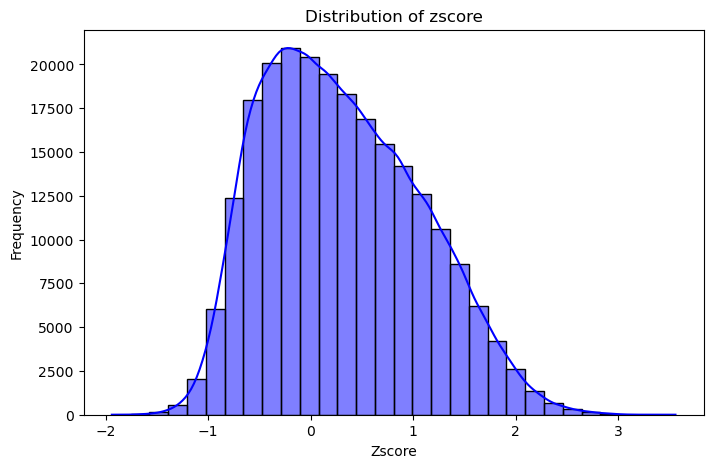

In [37]:
plt.figure(figsize=(8 ,5))
sns.histplot(data['Zscore'], kde = True, bins= 30, color='blue')
plt.title('Distribution of zscore')
plt.xlabel('Zscore')
plt.ylabel('Frequency')
plt.show()

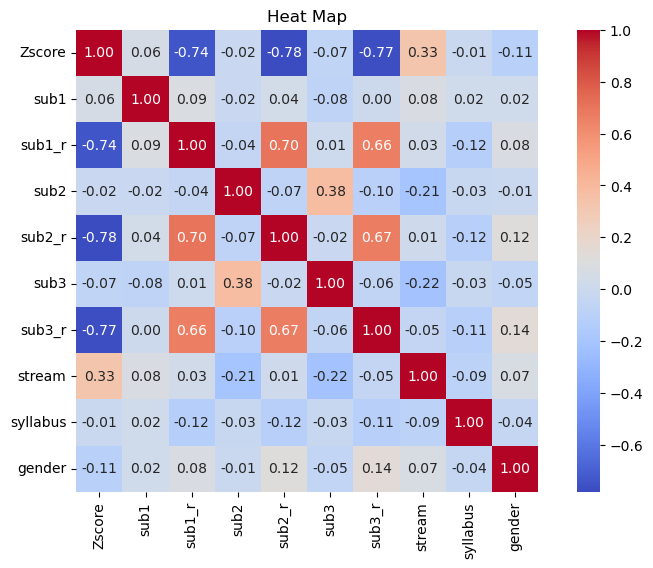

In [38]:
plt.figure(figsize=(10 ,6))
m_data = data[['Zscore', 'sub1','sub1_r','sub2','sub2_r','sub3','sub3_r','stream','syllabus','gender']]
sns.heatmap(m_data.corr(), annot= True, cmap='coolwarm', fmt='0.2f', square=True)
plt.title('Heat Map')
plt.show()

C:\Users\Sandamal\AppData\Local\Temp\ipykernel_11468\2031920313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stream', data=data, palette='viridis', order=data['stream'].value_counts().index)


<Axes: xlabel='stream', ylabel='count'>

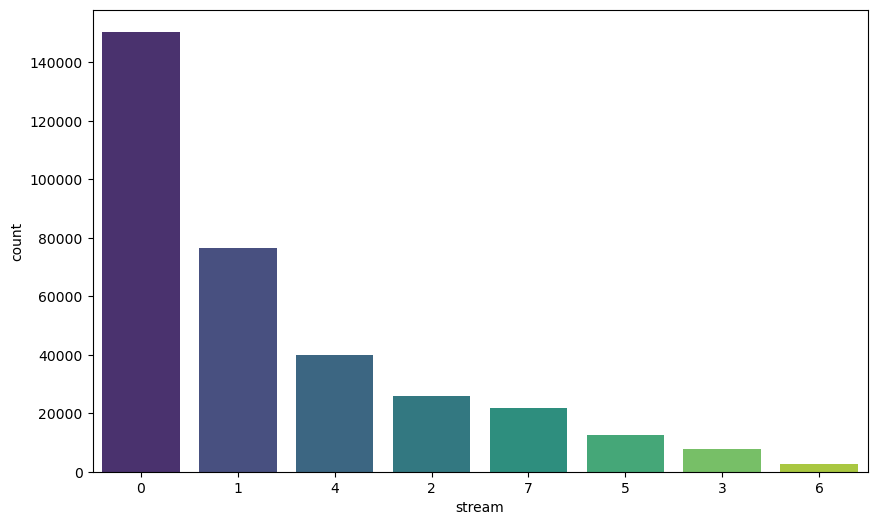

In [40]:
# optional
plt.figure(figsize=(10 ,6))
sns.countplot(x='stream', data=data, palette='viridis', order=data['stream'].value_counts().index)

In [43]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,-0.3550,47,5,20,3,58,6,0,2
1,1,-0.2648,47,5,12,3,58,4,0,2
2,4,-0.4760,21,5,11,5,0,6,0,2
3,4,-0.1012,21,3,11,3,0,6,0,2
4,4,0.6014,21,3,11,3,0,3,0,2


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   stream    337553 non-null  int32  
 1   Zscore    232304 non-null  float64
 2   sub1      337553 non-null  int32  
 3   sub1_r    337553 non-null  int32  
 4   sub2      337553 non-null  int32  
 5   sub2_r    337553 non-null  int32  
 6   sub3      337553 non-null  int32  
 7   sub3_r    337553 non-null  int32  
 8   syllabus  337553 non-null  int32  
 9   gender    337553 non-null  int32  
dtypes: float64(1), int32(9)
memory usage: 14.2 MB


In [47]:
data['Zscore'].fillna(data['Zscore'].mean(), inplace= True) # replace the mean of z score

C:\Users\Sandamal\AppData\Local\Temp\ipykernel_11468\2960439830.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Zscore'].fillna(data['Zscore'].mean(), inplace= True) # replace the mean of z score


In [49]:
X = data.drop(columns=['Zscore'])
y = data['Zscore']

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   stream    337553 non-null  int32
 1   sub1      337553 non-null  int32
 2   sub1_r    337553 non-null  int32
 3   sub2      337553 non-null  int32
 4   sub2_r    337553 non-null  int32
 5   sub3      337553 non-null  int32
 6   sub3_r    337553 non-null  int32
 7   syllabus  337553 non-null  int32
 8   gender    337553 non-null  int32
dtypes: int32(9)
memory usage: 11.6 MB


In [53]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 337553 entries, 0 to 337552
Series name: Zscore
Non-Null Count   Dtype  
--------------   -----  
337553 non-null  float64
dtypes: float64(1)
memory usage: 2.6 MB


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = model.predict(X_test)
y_pred

array([-0.12669943,  0.8794374 , -0.22595808, ...,  1.40217164,
        0.27357813, -0.10026123])

In [61]:
r2_score(y_test, y_pred)

0.6064914926424201

In [63]:
# Increase the accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)  #normalization
X_test_scaled = scaler.transform(X_test)

In [67]:
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)

LinearRegression()

In [75]:
y_pred2 = model2.predict(X_test_scaled)
y_pred2

array([-0.12669943,  0.8794374 , -0.22595808, ...,  1.40217164,
        0.27357813, -0.10026123])

In [77]:
r2_score(y_test, y_pred2)

0.60649149264242

In [79]:
import pickle
with open('model.pickle','wb') as file:
    pickle.dump(model2, file)

In [81]:
{label: code for label, code in zip(label_encoders['sub1'].classes_, range(len(label_encoders['sub1'].classes_)))}

{'ACCOUNTING': 0,
 'AGRICULTURAL SCIENCE': 1,
 'AGRO TECHNOLOGY': 2,
 'ART': 3,
 'BIO SYSTEMS TECHNOLOGY': 4,
 'BIO-RESOURCE TECHNOLOGY': 5,
 'BIOLOGY': 6,
 'BUDDHISM': 7,
 'BUDDHIST CIVILIZATION': 8,
 'BUSINESS STATISTICS': 9,
 'BUSINESS STUDIES': 10,
 'CARNATIC MUSIC': 11,
 'CHEMISTRY': 12,
 'CHRISTIAN CIVILIZATION': 13,
 'CHRISTIANITY': 14,
 'CIVIL TECHNOLOGY': 15,
 'COMBINED MATHEMATICS': 16,
 'COMMUNICATION & MEDIA STUDIES': 17,
 'DANCING(BHARATHA)': 18,
 'DANCING(INDIGENOUS)': 19,
 'DRAMA AND THEATRE (SINHALA)': 20,
 'ECONOMICS': 21,
 'ELECTRICAL,ELECTRONIC AND IT': 22,
 'ENGINEERING TECHNOLOGY': 23,
 'ENGLISH': 24,
 'FOOD TECHNOLOGY': 25,
 'GEOGRAPHY': 26,
 'GREEK & ROMAN CIVILIZATION': 27,
 'HIGHER MATHEMATICS': 28,
 'HINDU CIVILIZATION': 29,
 'HINDUISM': 30,
 'HISTORY OF EUROPE': 31,
 'HISTORY OF INDIA': 32,
 'HISTORY OF MODERN WORLD': 33,
 'HISTORY OF SRI LANKA & EUROPE': 34,
 'HISTORY OF SRI LANKA & INDIA': 35,
 'HISTORY OF SRI LANKA & MODERN WORLD': 36,
 'HOME ECONOMICS': 3

In [83]:
{label: code for label, code in zip(label_encoders['sub1_r'].classes_, range(len(label_encoders['sub1_r'].classes_)))}

{'A': 0, 'Absent': 1, 'B': 2, 'C': 3, 'F': 4, 'S': 5, 'Withheld': 6}

In [85]:
{label: code for label, code in zip(label_encoders['sub2'].classes_, range(len(label_encoders['sub2'].classes_)))}

{'ACCOUNTING': 0,
 'AGRICULTURAL SCIENCE': 1,
 'AGRO TECHNOLOGY': 2,
 'ARABIC': 3,
 'ART': 4,
 'BIO SYSTEMS TECHNOLOGY': 5,
 'BIO-RESOURCE TECHNOLOGY': 6,
 'BIOLOGY': 7,
 'BUDDHISM': 8,
 'BUDDHIST CIVILIZATION': 9,
 'BUSINESS STATISTICS': 10,
 'BUSINESS STUDIES': 11,
 'CARNATIC MUSIC': 12,
 'CHEMISTRY': 13,
 'CHINESE': 14,
 'CHRISTIAN CIVILIZATION': 15,
 'CHRISTIANITY': 16,
 'CIVIL TECHNOLOGY': 17,
 'COMBINED MATHEMATICS': 18,
 'COMMUNICATION & MEDIA STUDIES': 19,
 'DANCING(BHARATHA)': 20,
 'DANCING(INDIGENOUS)': 21,
 'DRAMA AND THEATRE (ENGLISH)': 22,
 'DRAMA AND THEATRE (SINHALA)': 23,
 'DRAMA AND THEATRE (TAMIL)': 24,
 'ECONOMICS': 25,
 'ELECTRICAL,ELECTRONIC AND IT': 26,
 'ENGINEERING TECHNOLOGY': 27,
 'ENGLISH': 28,
 'FOOD TECHNOLOGY': 29,
 'FRENCH': 30,
 'GEOGRAPHY': 31,
 'GERMAN': 32,
 'GREEK & ROMAN CIVILIZATION': 33,
 'HIGHER MATHEMATICS': 34,
 'HINDI': 35,
 'HINDU CIVILIZATION': 36,
 'HINDUISM': 37,
 'HISTORY OF EUROPE': 38,
 'HISTORY OF INDIA': 39,
 'HISTORY OF MODERN WORLD'

In [87]:
{label: code for label, code in zip(label_encoders['sub2_r'].classes_, range(len(label_encoders['sub2_r'].classes_)))}

{'A': 0, 'Absent': 1, 'B': 2, 'C': 3, 'F': 4, 'S': 5, 'Withheld': 6}

In [89]:
{label: code for label, code in zip(label_encoders['sub3'].classes_, range(len(label_encoders['sub3'].classes_)))}

{'ACCOUNTING': 0,
 'AGRICULTURAL SCIENCE': 1,
 'AGRO TECHNOLOGY': 2,
 'ARABIC': 3,
 'ART': 4,
 'BIO SYSTEMS TECHNOLOGY': 5,
 'BIO-RESOURCE TECHNOLOGY': 6,
 'BIOLOGY': 7,
 'BUDDHISM': 8,
 'BUDDHIST CIVILIZATION': 9,
 'BUSINESS STATISTICS': 10,
 'BUSINESS STUDIES': 11,
 'CARNATIC MUSIC': 12,
 'CHEMISTRY': 13,
 'CHINESE': 14,
 'CHRISTIAN CIVILIZATION': 15,
 'CHRISTIANITY': 16,
 'CIVIL TECHNOLOGY': 17,
 'COMBINED MATHEMATICS': 18,
 'COMMUNICATION & MEDIA STUDIES': 19,
 'DANCING(BHARATHA)': 20,
 'DANCING(INDIGENOUS)': 21,
 'DRAMA AND THEATRE (SINHALA)': 22,
 'DRAMA AND THEATRE (TAMIL)': 23,
 'ECONOMICS': 24,
 'ENGINEERING TECHNOLOGY': 25,
 'ENGLISH': 26,
 'FOOD TECHNOLOGY': 27,
 'FRENCH': 28,
 'GEOGRAPHY': 29,
 'GERMAN': 30,
 'GREEK & ROMAN CIVILIZATION': 31,
 'HIGHER MATHEMATICS': 32,
 'HINDI': 33,
 'HINDU CIVILIZATION': 34,
 'HINDUISM': 35,
 'HISTORY OF EUROPE': 36,
 'HISTORY OF INDIA': 37,
 'HISTORY OF MODERN WORLD': 38,
 'HISTORY OF SRI LANKA & EUROPE': 39,
 'HISTORY OF SRI LANKA & INDI

In [91]:
{label: code for label, code in zip(label_encoders['stream'].classes_, range(len(label_encoders['stream'].classes_)))}

{'-': 0,
 'ARTS': 1,
 'BIOLOGICAL SCIENCE': 2,
 'BIOSYSTEMS TECHNOLOGY': 3,
 'COMMERCE': 4,
 'ENGINEERING TECHNOLOGY': 5,
 'NON': 6,
 'PHYSICAL SCIENCE': 7}

In [93]:
{label: code for label, code in zip(label_encoders['syllabus'].classes_, range(len(label_encoders['syllabus'].classes_)))}

{'new': 0, 'old': 1}

In [95]:
{label: code for label, code in zip(label_encoders['gender'].classes_, range(len(label_encoders['gender'].classes_)))}

{'Major error': 0, 'Unknown': 1, 'female': 2, 'male': 3}

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   stream    337553 non-null  int32  
 1   Zscore    337553 non-null  float64
 2   sub1      337553 non-null  int32  
 3   sub1_r    337553 non-null  int32  
 4   sub2      337553 non-null  int32  
 5   sub2_r    337553 non-null  int32  
 6   sub3      337553 non-null  int32  
 7   sub3_r    337553 non-null  int32  
 8   syllabus  337553 non-null  int32  
 9   gender    337553 non-null  int32  
dtypes: float64(1), int32(9)
memory usage: 14.2 MB
